In [39]:
import numpy as np
from tensorflow.keras import models,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten 
import matplotlib.pyplot as plt
import random


### Load Dataset

In [31]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [32]:
print("Shape of X_train:",X_train.shape)  
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (2000, 30000)
Shape of Y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of Y_test: (400,)


In [33]:
#here in above shape for x_train we have 30000 ,explainination : as each image is of size 100*100 and RGB is 3
#example: RGB Images: (num_samples, height, width, 3) Example: If you have 50,000 color images of size 32x32, the shape will be:
#x_train.shape = (50000, 32, 32, 3)

In [34]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [35]:
print("Shape of X_train:",X_train.shape)  
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [36]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [37]:
#to train our model appropriately we rescaled these valyes between 0 to 1

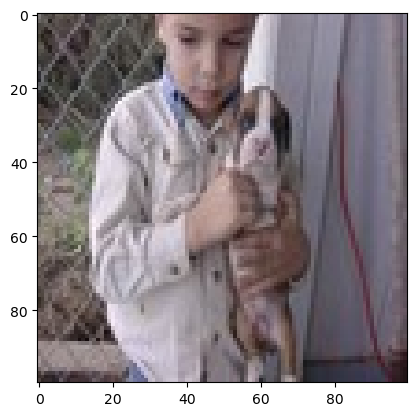

In [44]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

### Model 

In [47]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
model.fit(X_train,Y_train,epochs=5,batch_size=64) #training is done of the model by model.fit() with its parameters
                                                   # in the putput you can see how loss is decreasing and accuracy is increasing

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9492 - loss: 0.1481
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9733 - loss: 0.1192
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9708 - loss: 0.1085
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9854 - loss: 0.0748
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9844 - loss: 0.0763


In [57]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6358 - loss: 1.2604


[1.0218697786331177, 0.6825000047683716]

### Make Predictions


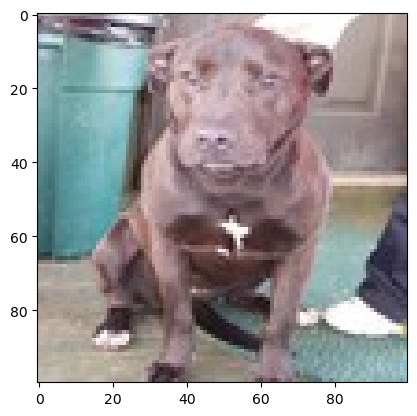

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.01600053]]
Our model says it is : dog


In [77]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

y_pred = y_pred > 0.5
if(y_pred == 0):
    pred='dog'
else:
    pred='cat'

print('Our model says it is :',pred)
